In [49]:
# importing pandas and the standard python datetime module
import pandas as pd
import numpy as np
import datetime as dt

# importing the data from the csv file
raw_crimes = pd.read_csv('estimated_crimes_1979_2020.csv')

cleaned_crimes = raw_crimes.drop(
    ['state_abbr', 'state_name', 'population', 'caveats'], axis=1)
melted_crimes = cleaned_crimes.melt(
    'year', var_name='crime', value_name='count')


Text(0.5, 1.0, 'Crimes committed in the US from 1977 to 2020')

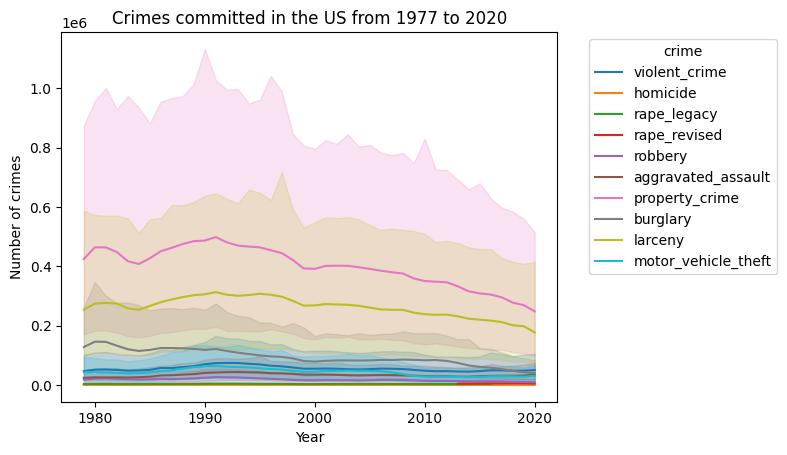

In [57]:
# visualisation of crime distribution
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.lineplot(data=melted_crimes, x='year', y='count', hue='crime', )
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1.05, 1))
ax.set_xlabel('Year')
ax.set_ylabel('Number of crimes')
ax.set_title('Crimes committed in the US from 1977 to 2020')
